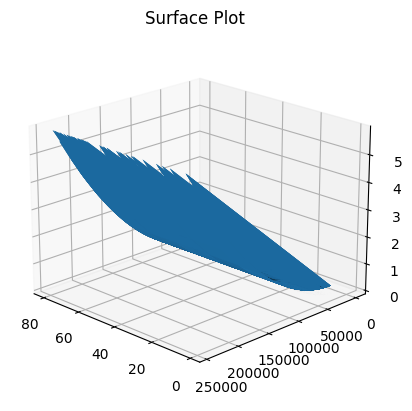

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('Toyota.csv')
x = data.iloc[:, 1].values  
y = data.iloc[:, 2].values

# Creating a grid of X and Y values
X, Y = np.meshgrid(x,y)

# Calculating Z values
Z = X ** 2  + Y ** 2

ax = plt.axes(projection='3d')

# Creating plot
ax.plot_surface(X, Y, Z)

# Set labels and title
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
ax.set_title('Surface Plot')
ax.view_init(elev=20, azim=135)

# Show plot
plt.show()

In [ ]:
import heapq

def bfs(graph,start,goal):
    frontier=[(0,start)]
    explored=set()
    
    while frontier:
        (cost,current_node)=heapq.heappop(frontier)
        
        if current_node == goal:
            return cost
        
        explored.add(current_node)
        
        for neighbor,neighbor_cost in  graph[current_node]:
            if neighbor not in explored and neighbor not in [node[1] for node in frontier]:
                heapq.heappush(frontier,(neighbor_cost+cost,neighbor))
                print(f"added {neighbor} with cost {neighbor_cost}")
                
    return None

graph={
    'A':[('B',5),('C',6)],
    'B':[('D',3)],
    'C':[]
}

start=input("START:")
goal=input("GOAL:")

ans=bfs(graph,start,goal)

print(ans)
    

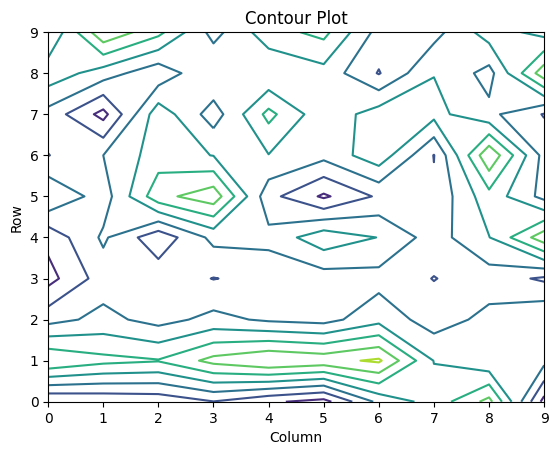

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('Toyota.csv')

# Extract the column data
column_data = data['Price'] 

# Reshape the column data into a 10x10 matrix
contour_data = column_data[:100].values.reshape(10,10)

# Creating the 2-D grid of features
X, Y = np.meshgrid(np.arange(10),np.arange(10))

# Creating plot
plt.contour(X, Y, contour_data)

# Set labels and title
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Contour Plot')

# Show plot
plt.show()

In [10]:
import heapq

def astar(graph,start,goal,heuristic):
    frontier=[(0+heuristic[start],start)]
    parent={start:None}
    cost={start:0}
    explored=set()
    
    while frontier:
        (f_val,curr_node)=heapq.heappop(frontier)
        
        if curr_node == goal:
            path=[]
            while curr_node is not None:
                path.append(curr_node)
                curr_node=parent[curr_node]
            path.reverse()
            return (path,cost[goal])
        
        explored.add(curr_node)
        for neighbor,neighbor_cost in graph[curr_node]:
            tent_g=cost[curr_node]+neighbor_cost
            if neighbor in explored:
                if tent_g >= cost.get(neighbor,float('inf')):
                    continue
                    
            if neighbor not in [node[1] for node in frontier] or tent_g < cost.get(neighbor,float("inf")):
                cost[neighbor]=tent_g
                parent[neighbor]=curr_node
                heapq.heappush(frontier,(tent_g+heuristic[neighbor],neighbor))
                
    return None
      
graph={
    'A':[('B',5),('C',6)],
    'B':[('D',3)],
    'C':[],
    'D':[]
}

heuristic={
    'A':10,
    'B':9,
    'C':8,
    'D':7
}
start=input("START:")
goal=input("GOAL:")

ans=astar(graph,start,goal,heuristic)

print(ans)    
    

START:A
GOAL:D
(['A', 'B', 'D'], 8)


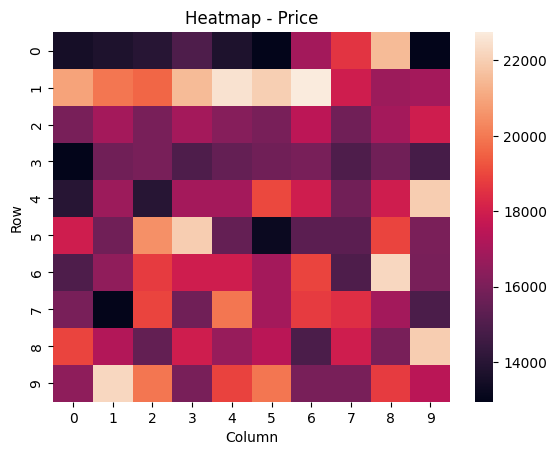

In [9]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('Toyota.csv')

# Extract the column data
column_data = data['Price']
# print(column_data[:100])

# Reshape the column data into a 10x10 matrix
heatmap_data = column_data[:100].values.reshape(10, 10)
# print(heatmap_data)

# Plotting the heatmap
sn.heatmap(data=heatmap_data)

# Set title and labels
column_name = "Price"  # Replace with the name of the chosen column
plt.title(f"Heatmap - {column_name}")
plt.xlabel('Column')
plt.ylabel('Row')

# Display the plotted heatmap
plt.show()

In [19]:
import math

def minimax(cur_dep,idx,maxturn,scores,target):
    if cur_dep==target:
        return scores[idx]
    
    if maxturn:
        return max(minimax(cur_dep+1,idx*2,False,scores,target),minimax(cur_dep+1,idx*2+1,False,scores,target))
                   
    else:
        return min(minimax(cur_dep+1,idx*2,True,scores,target),minimax(cur_dep+1,idx*2+1,True,scores,target))

                   
scores=[1,2,3,4,5,6,7,8]
target=math.log(len(scores),2)
ans=minimax(0,0,True,scores,target)
                   
print(ans)                   

6


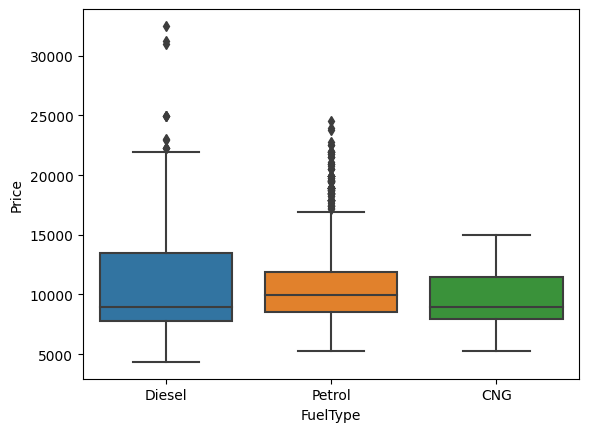

In [10]:
import seaborn as sns
import pandas as pd

# Load data from CSV
data = pd.read_csv('Toyota.csv').dropna()

fueltype = data['FuelType'].unique()

sns.boxplot(x=data["FuelType"], y=data['Price'])
plt.xticks(range(len(fueltype)), fueltype)

plt.show()

In [22]:

MIN,MAX=-1000,1000

def minimax(depth,idx,maxturn,scores,alpha,beta):
    if depth == 3:
        return scores[idx]
    
    if maxturn:
        best=MIN
        
        for i in range(0,2):
            val=minimax(depth+1,idx*2+i,False,scores,alpha,beta)
            best=max(best,val)
            alpha=max(alpha,best)
            
            if alpha>=beta:
                break
                
        return best
    
    else:
        best=MAX
        
        for i in range(0,2):
            val=minimax(depth+1,idx*2+i,True,scores,alpha,beta)
            best=min(best,val)
            beta=min(beta,best)
            
            if alpha>=beta:
                break
                
        return best
        

scores=[1,2,3,4,5,6,7,8]
ans=minimax(0,0,True,scores,MIN,MAX)
print(ans)

6


In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df=pd.read_csv('titanic.csv')
df=df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']]
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Embarked']=df['Embarked'].map({'C':0,'Q':1,'S':2})

train_1,test_1=train_test_split(df,test_size=0.2,random_state=41)

X_train1=train_1.drop('Survived',axis=1)
y_train1=train_1['Survived']
X_test1=test_1.drop('Survived',axis=1)
y_test1=test_1['Survived']

class NaiveBayesClassifier:
    def __init__(self):
        self.prior={}
        self.conditional={}
        
    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.classes=np.unique(y)
        for c in self.classes:
            self.prior[c]=np.mean(y==c)
        for feature in X.columns:
            self.conditional[feature]={}
            for c in self.classes:
                feature_values=X[feature][y==c]
                self.conditional[feature][c]={
                    'mean':np.mean(feature_values),
                    'std':np.std(feature_values)
                }
                
    def predict(self,X):
        y_pred=[]
        for _,sample in X.iterrows():
            probabilities={}
            for c in self.classes:
                probabilities[c]=self.prior[c]
                for feature in X.columns:
                    mean=self.conditional[feature][c]['mean']
                    std=self.conditional[feature][c]['std']
                    x=sample[feature]
                    probabilities[c]*=self._gaussian_pdf(x,mean,std)
            y_pred.append(max(probabilities,key=probabilities.get))
        return y_pred
    @staticmethod
    def _gaussian_pdf(x,mean,std):
        exponent=np.exp(-((x-mean)**2)/(2*std**2))
        return (1/(np.sqrt(2*np.pi)*std))*exponent
    
clf=NaiveBayesClassifier()
clf.fit(X_train1,y_train1)
pred=clf.predict(X_test1)
print(confusion_matrix(y_test1,pred))
print(f"Accuracy: {np.mean(pred==y_test1)}")

[[88 17]
 [42 32]]
Accuracy: 0.6703910614525139


In [25]:
import numpy as np
import pandas as pd 
from collections import Counter
from sklearn.model_selection import train_test_split

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self,k):
        self.k=k
        
    def fit(self,X,y):
        self.X_train=X
        self.y_train=y
        
    def predict(self,X):
        predictions=[self._predict(x) for x in X]
        return predictions
    def _predict(self,x):
        y_pred=[]
        distances=[euclidean_distance(x,x_train) for x_train in self.X_train]
        k_indices=np.argsort(distances)[:self.k]
        k_labels=[self.y_train[i] for i in k_indices]
        most_common=Counter(k_labels).most_common()
        return most_common[0][0]
    
df=pd.read_csv('glass.csv')
X=df.drop('Type',axis=1).values
y=df['Type'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)
clf=KNN(k=3)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(f"Acc: {np.mean(predictions==y_test)}")

Acc: 0.7230769230769231


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

# Load Fruit dataset
fruit = pd.read_csv("fruit.csv")
fruit_X = fruit.drop("fruit_label", axis=1)
fruit_y = fruit["fruit_label"]

# Define distance metrics
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Define KNN classifier
def KNN_classifier(X_train, y_train, X_test, k, distance_metric):
    y_pred = []
    for i in range(X_test.shape[0]):
        distances = cdist(X_train, [X_test.iloc[i]], metric=distance_metric)
        nearest_indices = np.argsort(distances, axis=0)[:k].flatten()
        nearest_labels = y_train.iloc[nearest_indices]
        label_counts = np.bincount(nearest_labels)
        predicted_label = np.argmax(label_counts)
        y_pred.append(predicted_label)
    return y_pred

# Define function to split dataset into training and testing
for ts in [0.2]:
    print(f"Results for Fruit dataset test_size={ts} and Manhattan distance:")
    X_train, X_test, y_train, y_test = train_test_split(fruit_X, fruit_y, test_size=ts, random_state=42)
    for k in [5]:
        y_pred=KNN_classifier(X_train,y_train,X_test,k,manhattan_distance)
        acc=np.mean(y_pred==y_test)
        print(f"k={k} Accuracy:{acc:.2f}")
        print()


Results for Fruit dataset test_size=0.2 and Manhattan distance:
k=5 Accuracy:0.50



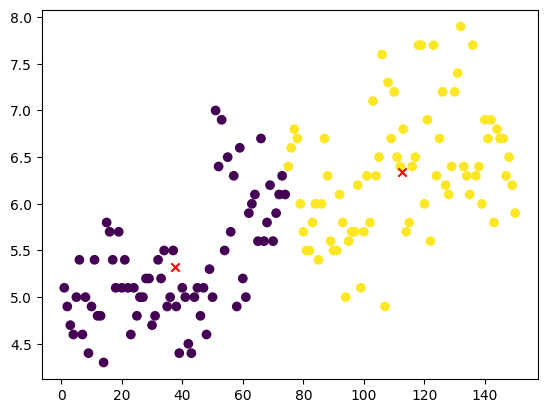

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self,n_clusters,max_iterations=100):
        self.n_clusters=n_clusters
        self.max_iterations=max_iterations
        
    def fit(self,X):
        self.centroids=X[np.random.choice(range(X.shape[0]),self.n_clusters,replace=False)]
        for _ in range(self.max_iterations):
            distances=self.calculate_distances(X)
            labels=np.argmin(distances,axis=1)
            new_centroids=np.array([X[labels==k].mean(axis=0) for k in range(self.n_clusters)])
            
            if np.all(self.centroids ==  new_centroids):
                  break
            self.centroids=new_centroids
        return labels
                                          
    def calculate_distances(self,X):
          distances=np.sqrt(((X[:,np.newaxis]-self.centroids)**2).sum(axis=2))
          return distances

data=pd.read_csv('Iris.csv')

X=data.iloc[:,:-1].values
kmeans=KMeans(n_clusters=2)
labels=kmeans.fit(X)

plt.scatter(X[:,0],X[:,1],c=labels,cmap="viridis")
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],marker='x',color='red')
plt.show()
      
        

[[  0.           1.13578167   2.06397674 ... 147.08123606 148.08656252
  149.07092272]
 [  1.13578167   0.           1.04403065 ... 146.08299011 147.08929261
  148.07177314]
 [  2.06397674   1.04403065   0.         ... 145.08869701 146.09418195
  147.07644271]
 ...
 [147.08123606 146.08299011 145.08869701 ...   0.           1.17473401
    2.1       ]
 [148.08656252 147.08929261 146.09418195 ...   1.17473401   0.
    1.26095202]
 [149.07092272 148.07177314 147.07644271 ...   2.1          1.26095202
    0.        ]]
[[  0.           1.13578167   2.06397674 ... 147.08123606 148.08656252
  149.07092272]
 [  1.13578167   0.           1.04403065 ... 146.08299011 147.08929261
  148.07177314]
 [  2.06397674   1.04403065   0.         ... 145.08869701 146.09418195
  147.07644271]
 ...
 [147.08123606 146.08299011 145.08869701 ...   0.           1.17473401
    2.1       ]
 [148.08656252 147.08929261 146.09418195 ...   1.17473401   0.
    1.26095202]
 [149.07092272 148.07177314 147.07644271 ...   2

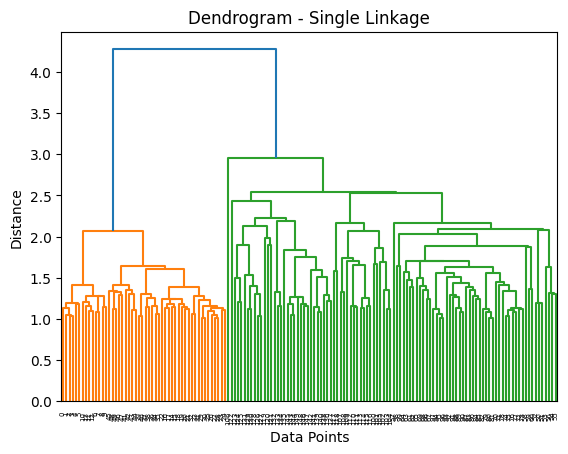

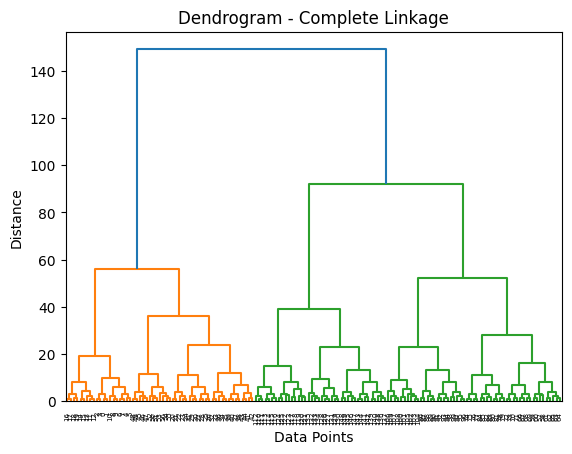

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage

iris=np.loadtxt('Iris.csv',delimiter=',',skiprows=1)
def single_link(data):
    n=data.shape[0]
    proximity=np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            proximity[i,j]=np.min(np.linalg.norm(data[i]-data[j]))
            proximity[j,i]=proximity[i,j]
    return proximity   

def complete_link(data):
    n=data.shape[0]
    proximity=np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            proximity[i,j]=np.max(np.linalg.norm(data[i]-data[j]))
            proximity[j,i]=proximity[i,j]
    return proximity 

single_matrix=single_link(iris)
print(single_matrix)

complete_matrix=complete_link(iris)
print(complete_matrix)

link_mat=linkage(iris,method='single')

dendrogram(link_mat)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


link_mat=linkage(iris,method='complete')

dendrogram(link_mat)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

(150, 4)
(150, 2)


C:\Users\SHRAVAN DALAVI\AppData\Local\Temp\ipykernel_23436\1896653215.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1,x2,c=y,alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))


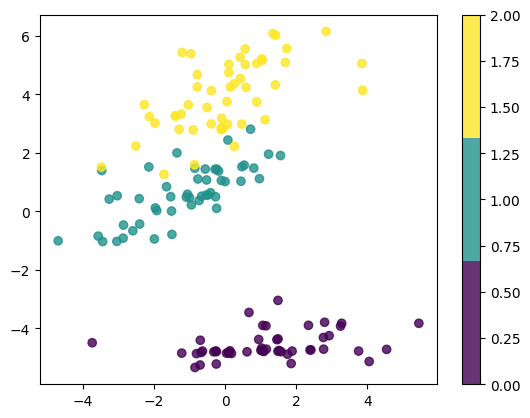

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class PCA:
    def __init__(self,n_components):
        self.n_components=n_components
        self.components=None
        self.mean=None
    
    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        cov=np.cov(X.T)
        eigenvectors,eigenvalues=np.linalg.eig(cov)
        eigenvectors=eigenvectors.T
        idxs=np.argsort(eigenvalues)[::-1]
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]
        self.components=eigenvectors[:self.n_components]
        
    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.components.T)
    
pca=PCA(2)

data=datasets.load_iris()
X=data.data
y=data.target

pca.fit(X)

X_projected=pca.transform(X)
print(X.shape)
print(X_projected.shape)

x1=X_projected[:,0]
x2=X_projected[:,1]
plt.scatter(x1,x2,c=y,alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))
plt.colorbar()
plt.show()

C:\Users\SHRAVAN DALAVI\AppData\Local\Temp\ipykernel_2916\646618638.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1,x2,c=y,alpha=0.8,cmap=plt.cm.get_cmap("viridis",3))


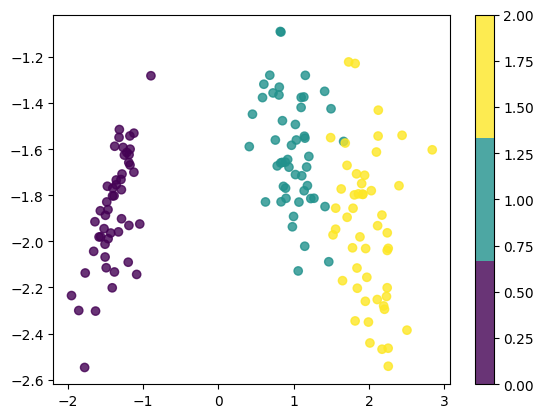

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class LDA:
    def __init__(self,n_components):
        self.n_components=n_components
        self.lin_disc=None
        
    def fit(self,X,y):
        n_features=X.shape[1]
        class_labels=np.unique(y)
        mean_overall=np.mean(X,axis=0)
        SW=np.zeros((n_features,n_features))
        SB=np.zeros((n_features,n_features))
        for c in class_labels:
            X_c=X[y==c]
            mean_c=np.mean(X_c,axis=0)
            SW+=(X_c-mean_c).T.dot(X_c-mean_c)
            n_c=X_c.shape[0]
            mean_diff=(mean_c-mean_overall).reshape(n_features,1)
            SB+=n_c*(mean_diff).dot(mean_diff.T)
            
        A=np.linalg.inv(SW).dot(SB)
        eigenvalues,eigenvectors=np.linalg.eig(A)
        eigenvectors=eigenvectors.T
        idxs=np.argsort(eigenvalues)[::-1]
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]
        self.lin_disc=eigenvectors[:self.n_components]
       
    def transform(self,X):
        return np.dot(X,self.lin_disc.T)
    
data=datasets.load_iris()
X=data.data
y=data.target

lda=LDA(2)
lda.fit(X,y)
X_proj=lda.transform(X)
x1=X_proj[:,0]
x2=X_proj[:,1]
plt.scatter(x1,x2,c=y,alpha=0.8,cmap=plt.cm.get_cmap("viridis",3))
plt.colorbar()
plt.show()
        